## Load packages 
We load the packages used for the analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import glob 
from keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Flatten , Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
for dirname, _, filenames in os.walk('/kaggle/input'):
     print(dirname, "contains", len(filenames), "files.")
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate contains 1 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test/EGL contains 270 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test/ML contains 270 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train contains 0 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train/EGL contains 1080 files.
/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train/ML contains 1080 files.


## Load data


In [47]:
train_data = '/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/train'
test_data = '/kaggle/input/p7eglmltilesshiftrotate/P7-EGL-ML-tiles-shift-rotate/test'
batch_size = 32
img_height = 300
img_width = 300

## Split train data
spliting train data into **train** and **validation** with 80:30 ratio

In [86]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, 
#     rotation_range = 40,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
    horizontal_flip=True,
    validation_split=0.3,
    fill_mode = 'nearest')

train_generator = datagen.flow_from_directory(
    train_data,
    shuffle=True,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data,
     shuffle=False,
    target_size = (300,300),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)


Found 1512 images belonging to 2 classes.
Found 648 images belonging to 2 classes.


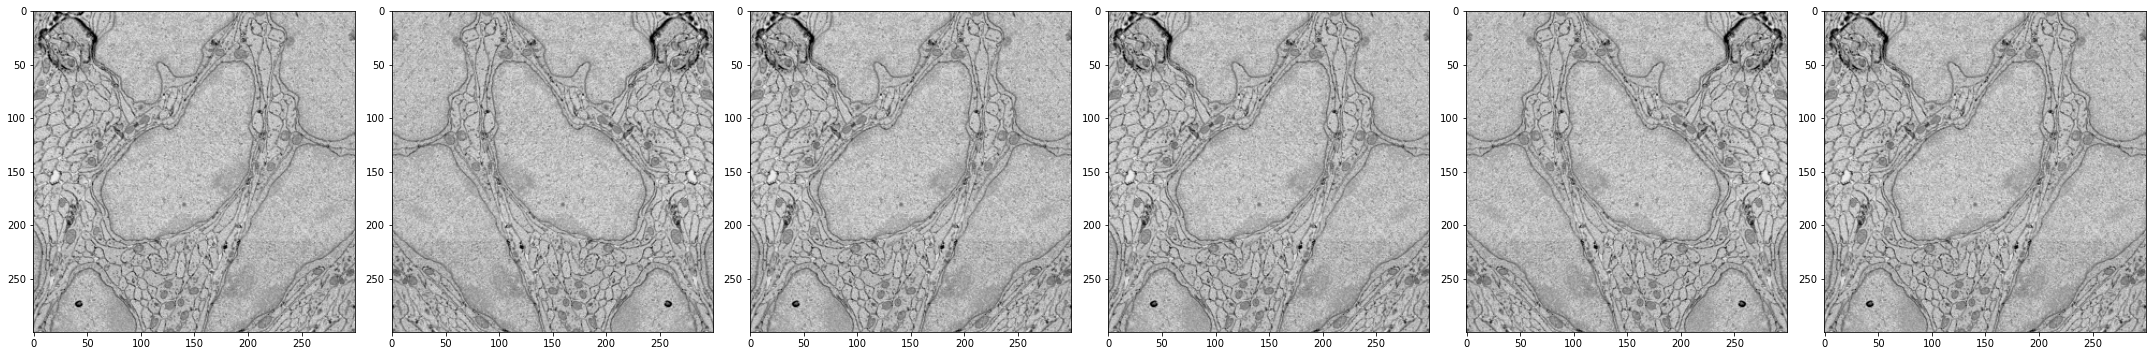

In [82]:
augmented_images = [train_generator[0][0][0] for i in range(6)]
plotImages(augmented_images)


## Model Creation 
### Define the model 

In [87]:
activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, (3,3), activation = activation, padding = 'same', input_shape = (300, 300, 3)))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(64,(3,3), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D(2,2))


feature_extractor.add(Conv2D(128,(3,3), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(128,(3,3), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(Dropout(0.5))

feature_extractor.add(Flatten())



### Add dense layer 

In [88]:

x = feature_extractor.output
x = Dense(512, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(1, activation = 'sigmoid')(x)

### Compiling the model

In [89]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40_input (InputLayer) [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 37, 37, 128)       0   

## Train cnn model 

In [90]:
# callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = cnn_model.fit(train_generator ,validation_data=validation_generator, epochs=50)

Epoch 1/50
48/48 [==============================] - 14s 276ms/step - loss: 2.4107 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
48/48 [==============================] - 13s 278ms/step - loss: 0.6893 - accuracy: 0.5141 - val_loss: 0.6608 - val_accuracy: 0.5231
Epoch 3/50
48/48 [==============================] - 13s 271ms/step - loss: 0.7047 - accuracy: 0.5114 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/50
48/48 [==============================] - 13s 275ms/step - loss: 0.6877 - accuracy: 0.5142 - val_loss: 0.5638 - val_accuracy: 0.7238
Epoch 5/50
48/48 [==============================] - 14s 286ms/step - loss: 0.6387 - accuracy: 0.6397 - val_loss: 0.6764 - val_accuracy: 0.5000
Epoch 6/50
48/48 [==============================] - 13s 272ms/step - loss: 0.6000 - accuracy: 0.6534 - val_loss: 0.7718 - val_accuracy: 0.6343
Epoch 7/50
48/48 [==============================] - 13s 280ms/step - loss: 0.4557 - accuracy: 0.8019 - val_loss: 1.1905 - val_accuracy: 0.5772

## Visualizing results of the training 

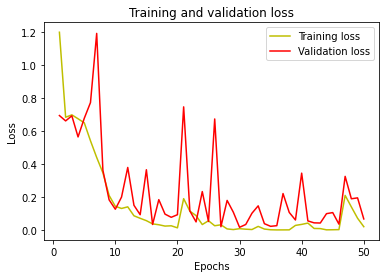

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

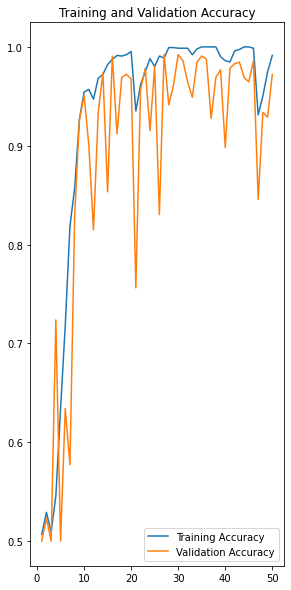

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')